Mean power of the Original Tone: 0.499995 V
Mean power of the noise: 5.015386107621964e-06 V
Mean power of the noisy Tone: 0.4999943230533418 V


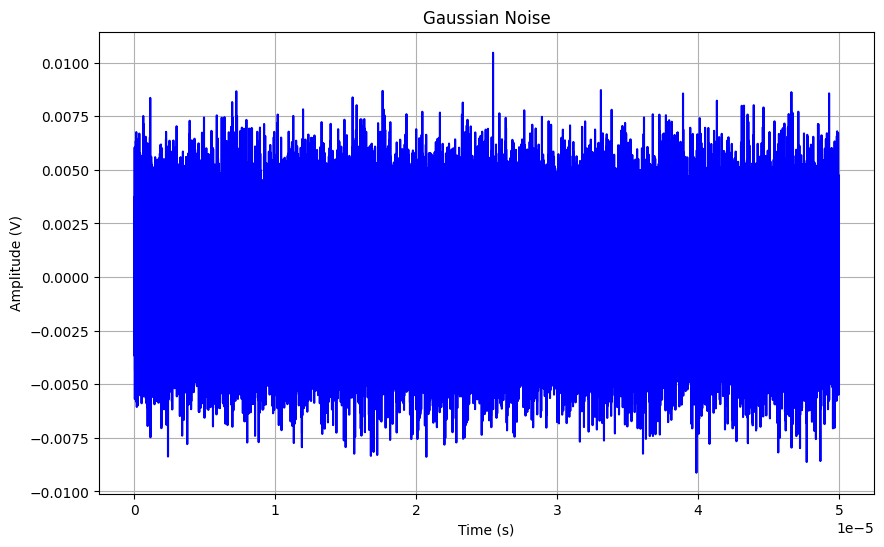

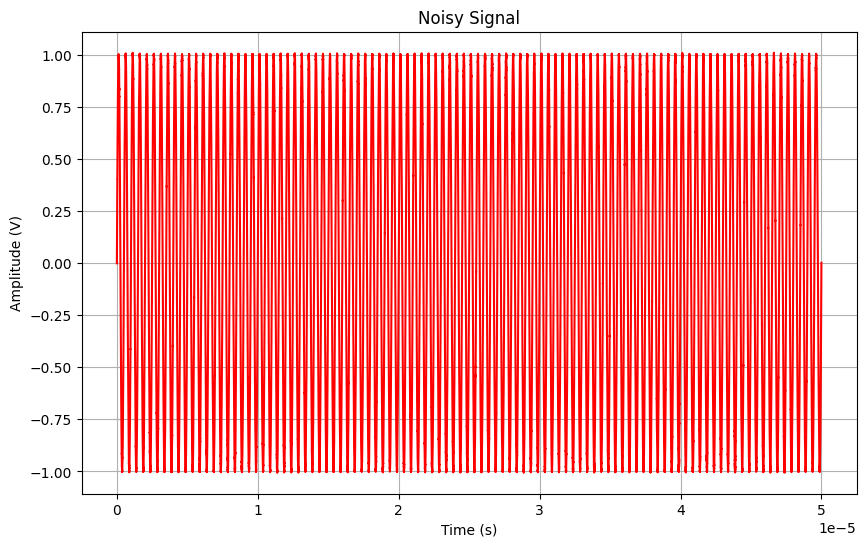

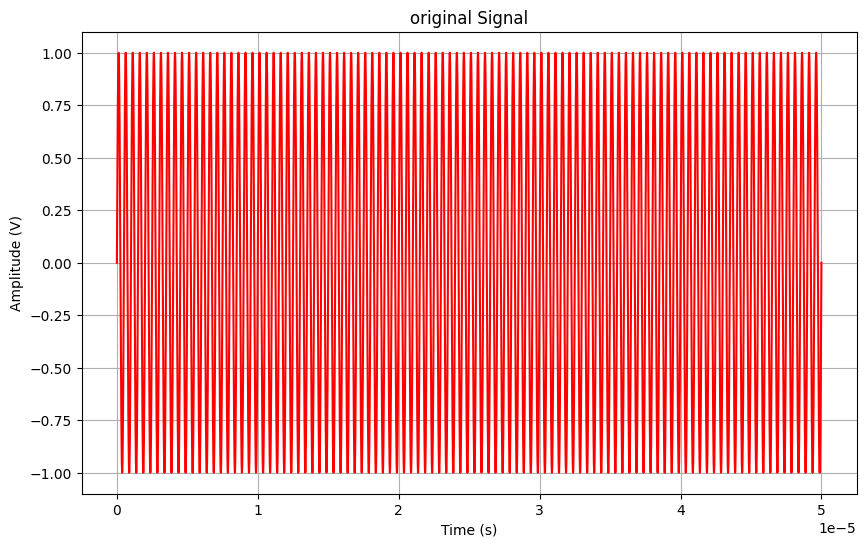

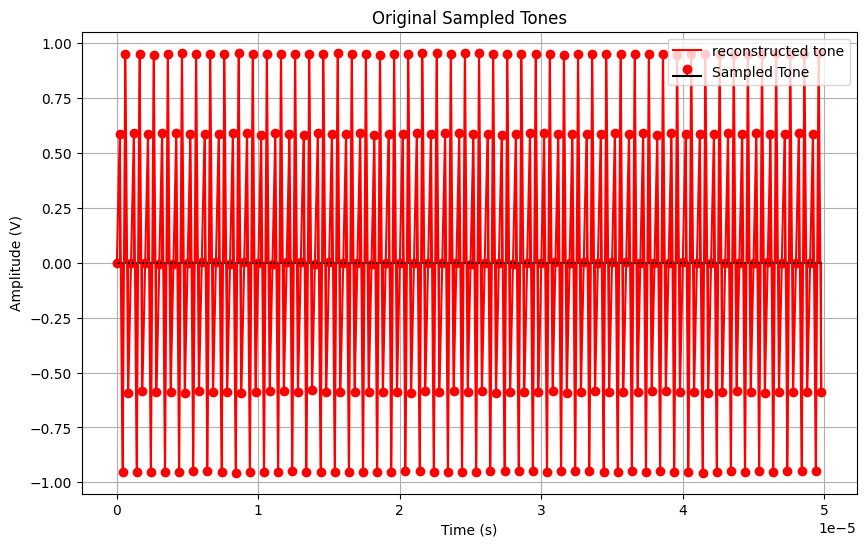

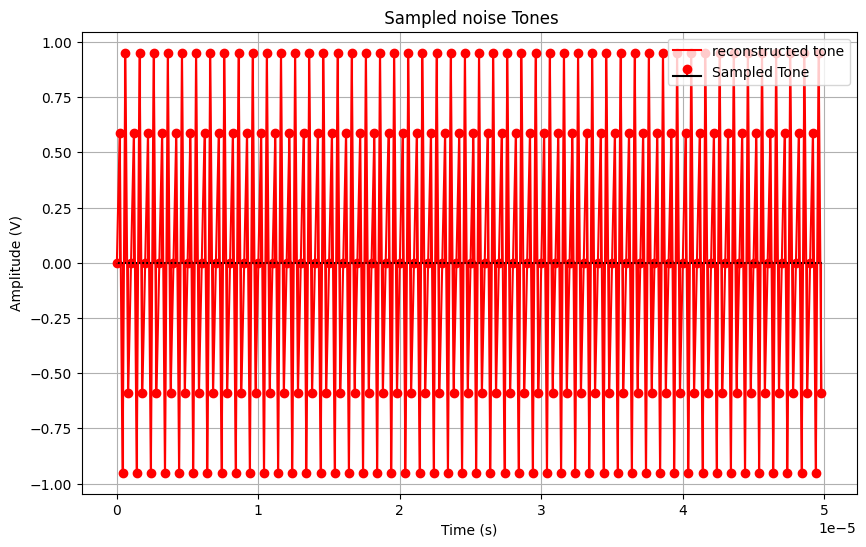

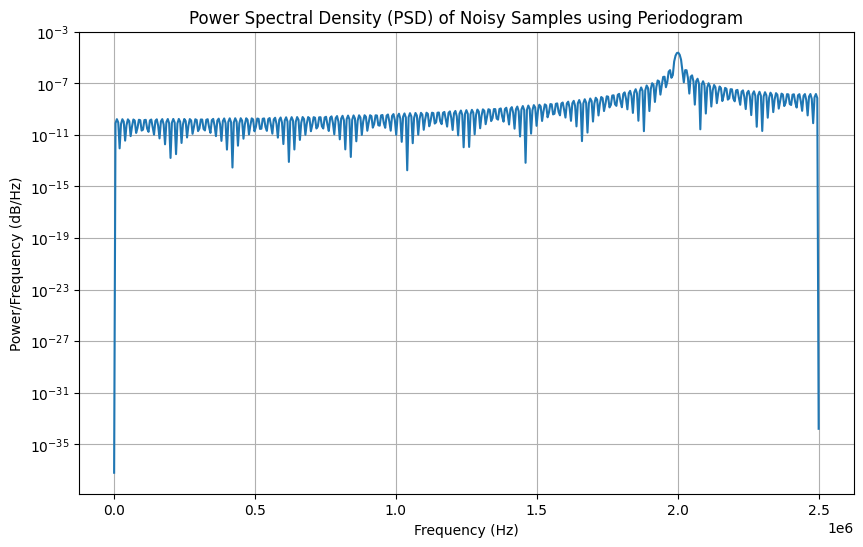

Signal Power-noisy: 0.00999975280246028 W
Noise Power-noisy: 1.3365772426336223e-07 W
Calculated SNR (from periodogram): 48.73995201922459 dB
Theoretical SNR:50 dB
Variance of uniformly distributed noise for same SNR: 1.336577242633622e-07


In [33]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import periodogram

# Define parameters
frequency = 2e6  # 2 MHz
amplitude = 1.0  # 1 V
sampling_frequency = 5e6  # 5 MHz

# Time array for the original tone
original_t = np.linspace(0, 100*(1 / frequency), 100000)
# original sine wave
original_tone = amplitude * np.sin(2 * np.pi * frequency * original_t)


sampling_interval = 1 / sampling_frequency
sampled_t = np.arange(0, 100*(1 / frequency), sampling_interval)
# Compute the mean value of the original tone
mean_power = np.mean(original_tone ** 2)


print("Mean power of the Original Tone:", mean_power, "V")
#for SNR=50db , calculated noise variance using mean power obtained from above.
noise_variance=5e-6

# Generate Gaussian noise with variance 5u
noise = np.random.normal(0, np.sqrt(noise_variance), len(original_t))

# Adding noise to the original tone
noisy_tone = original_tone + noise
mean_power_noisy = np.mean(noisy_tone**2)
mean_power_nois = np.mean(noise ** 2)
# Print the mean value
print("Mean power of the noise:", mean_power_nois, "V")
print("Mean power of the noisy Tone:", mean_power_noisy, "V")
# Generate the sampled sine wave
sampled_tone = amplitude * np.sin(2 * np.pi * frequency * sampled_t)
sampled_noisy_tone = amplitude * np.sin(2 * np.pi * frequency * sampled_t) + \
                      np.random.normal(0, np.sqrt(noise_variance), len(sampled_t))

# Plot the noise
plt.figure(figsize=(10, 6))
plt.plot(original_t, noise, color='blue')
plt.title('Gaussian Noise')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (V)')
plt.grid(True)
plt.show()

#noisy signal plot
plt.figure(figsize=(10, 6))
plt.plot(original_t, noisy_tone, color='red')
plt.title('Noisy Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (V)')
plt.grid(True)
plt.show()


# Plot the original tone
plt.figure(figsize=(10, 6))
plt.plot(original_t, original_tone, color='red')
plt.title('original Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (V)')
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 6))


plt.stem(sampled_t, sampled_noisy_tone, 'r', markerfmt='ro', linefmt='r', basefmt='k', label='Sampled Tone')
plt.plot(sampled_t, sampled_noisy_tone,'r',label='reconstructed tone')

plt.title('Original Sampled Tones')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (V)')
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))


plt.stem(sampled_t, sampled_tone, 'r', markerfmt='ro', linefmt='r', basefmt='k', label='Sampled Tone')
plt.plot(sampled_t, sampled_tone,'r',label='reconstructed tone')
plt.title(' Sampled noise Tones')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (V)')
plt.grid(True)
plt.legend()
plt.show()

frequencies, psd = periodogram(sampled_tone, fs=sampling_frequency, nfft= 1024)

# Plot the Power Spectral Density (PSD)
plt.figure(figsize=(10, 6))
plt.semilogy(frequencies, psd)
plt.title('Power Spectral Density (PSD) of Noisy Samples using Periodogram')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.grid(True)
plt.show()

frequencies, psd = periodogram(noisy_tone, fs=sampling_frequency, scaling='density')

freq_xmax=frequencies[np.argmax(psd)]

signal_power=0
noise_power=0
for i in range(len(frequencies)):
  if(frequencies[i]==freq_xmax):
    signal_power+=psd[i]
  else:
    noise_power+=psd[i]

print("Signal Power-noisy:", signal_power, "W")

print("Noise Power-noisy:", noise_power, "W")


# SNR in dB
SNR_dB = 10 * np.log10(signal_power / noise_power)
print("Calculated SNR (from periodogram):", SNR_dB, "dB")

print("Theoretical SNR:50 dB")
uniform_noise_variance = signal_power / (10 ** (SNR_dB / 10))


print("Variance of uniformly distributed noise for same SNR:", uniform_noise_variance)

Mean power of the Original Tone: 0.499995 V
Mean power of the noise: 4.9866164958573575e-06 V
Mean power of the noisy Tone: 0.4999939225731232 V


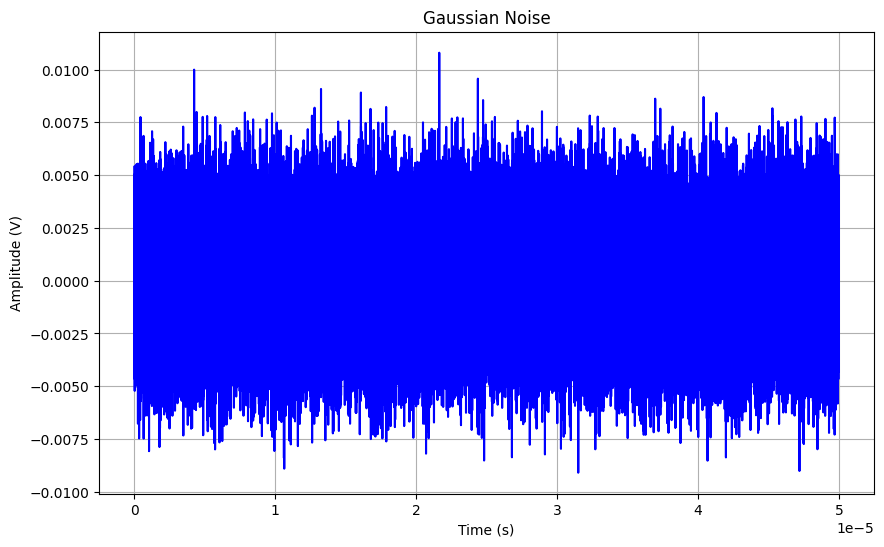

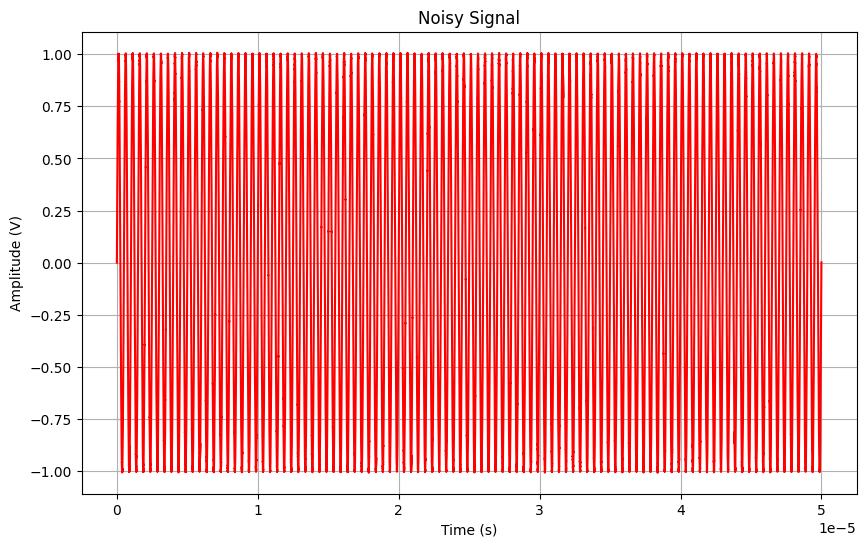

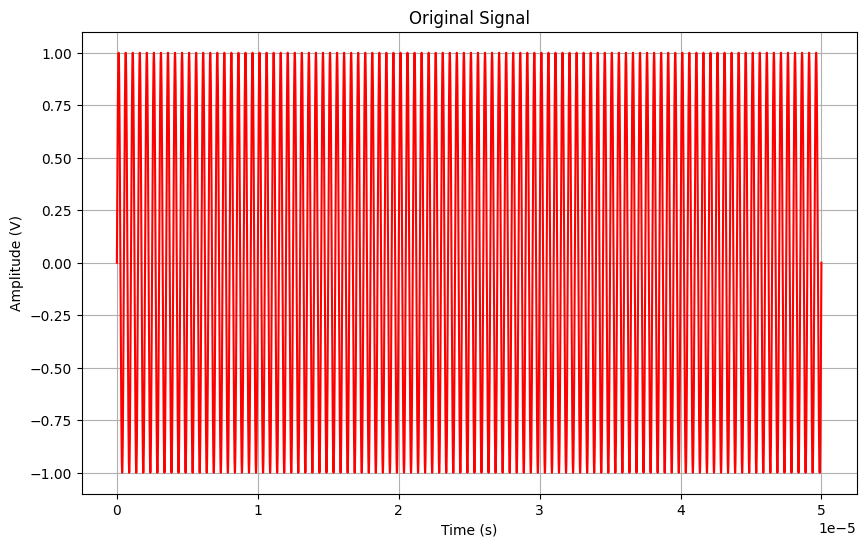

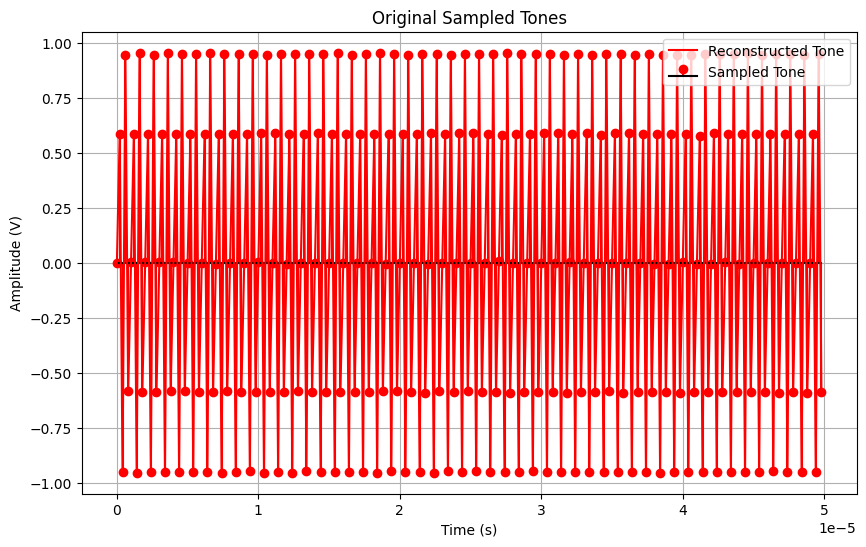

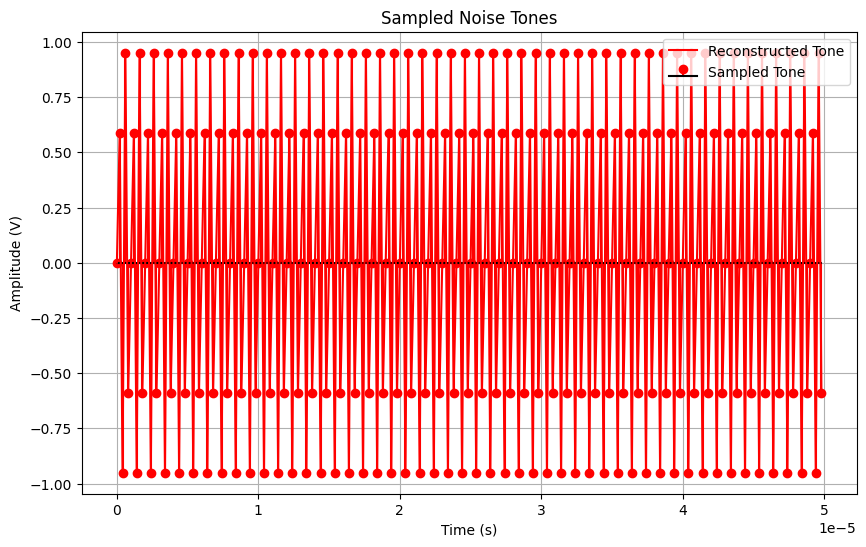

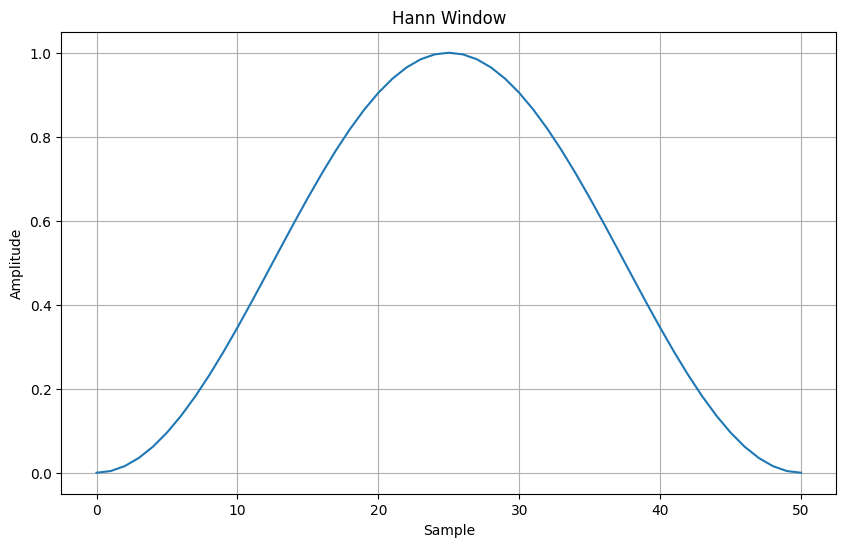

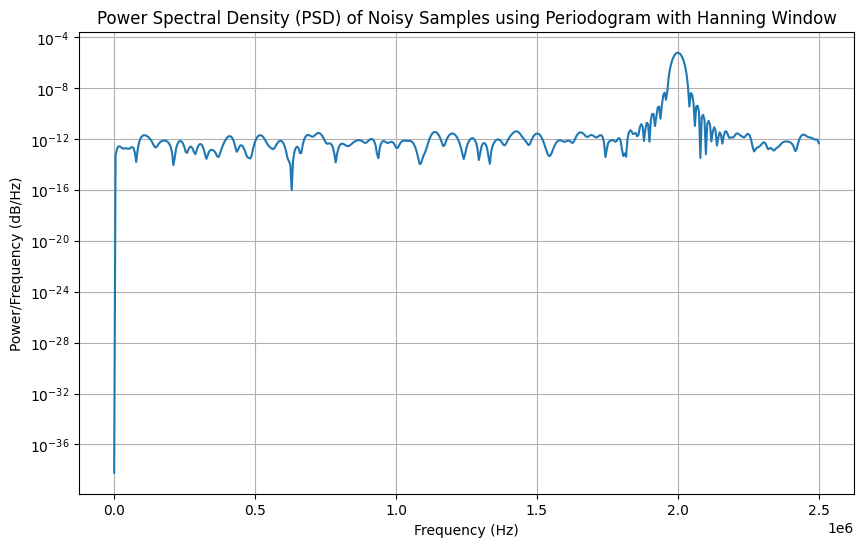

Signal Power-noisy: 0.009999746037024632 W
Noise Power-noisy: 1.3241443585845317e-07 W
Calculated SNR (from periodogram): 48.78053635798666 dB
Theoretical SNR: 50 dB
Variance of uniformly distributed noise for same SNR: 1.3241443585845304e-07


In [38]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import periodogram, get_window

# Define parameters
frequency = 2e6  # 2 MHz
amplitude = 1.0  # 1 V
sampling_frequency = 5e6  # 5 MHz

# Time array for the original tone
original_t = np.linspace(0, 100*(1 / frequency), 100000)
# original sine wave
original_tone = amplitude * np.sin(2 * np.pi * frequency * original_t)

sampling_interval = 1 / sampling_frequency
sampled_t = np.arange(0, 100*(1 / frequency), sampling_interval)
# Compute the mean value of the original tone
mean_power = np.mean(original_tone ** 2)

print("Mean power of the Original Tone:", mean_power, "V")
# For SNR = 50 dB, calculated noise variance using mean power obtained from above.
noise_variance = 5e-6

# Generate Gaussian noise with variance 5u
noise = np.random.normal(0, np.sqrt(noise_variance), len(original_t))

# Adding noise to the original tone
noisy_tone = original_tone + noise
mean_power_noisy = np.mean(noisy_tone ** 2)
mean_power_nois = np.mean(noise ** 2)

print("Mean power of the noise:", mean_power_nois, "V")
print("Mean power of the noisy Tone:", mean_power_noisy, "V")
# Generate the sampled sine wave
sampled_tone = amplitude * np.sin(2 * np.pi * frequency * sampled_t)
sampled_noisy_tone = amplitude * np.sin(2 * np.pi * frequency * sampled_t) + np.random.normal(0, np.sqrt(noise_variance), len(sampled_t))

# Apply Hanning window using get_window function
window = get_window('hann', len(sampled_t))
sampled_noisy_tone_windowed = sampled_noisy_tone * window

# Plot the noise
plt.figure(figsize=(10, 6))
plt.plot(original_t, noise, color='blue')
plt.title('Gaussian Noise')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (V)')
plt.grid(True)
plt.show()

# Noisy signal plot
plt.figure(figsize=(10, 6))
plt.plot(original_t, noisy_tone, color='red')
plt.title('Noisy Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (V)')
plt.grid(True)
plt.show()

# Plot the original tone
plt.figure(figsize=(10, 6))
plt.plot(original_t, original_tone, color='red')
plt.title('Original Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (V)')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.stem(sampled_t, sampled_noisy_tone, 'r', markerfmt='ro', linefmt='r', basefmt='k', label='Sampled Tone')
plt.plot(sampled_t, sampled_noisy_tone, 'r', label='Reconstructed Tone')
plt.title('Original Sampled Tones')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (V)')
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.stem(sampled_t, sampled_tone, 'r', markerfmt='ro', linefmt='r', basefmt='k', label='Sampled Tone')
plt.plot(sampled_t, sampled_tone, 'r', label='Reconstructed Tone')
plt.title('Sampled Noise Tones')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (V)')
plt.grid(True)
plt.legend()
plt.show()

M = 51
window = np.hanning(M)

# Plot the window
plt.figure(figsize=(10, 6))
plt.plot(window)
plt.title("Hann Window")
plt.xlabel("Sample")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

# Plot the Power Spectral Density (PSD) with Hanning window applied
frequencies, psd = periodogram(sampled_noisy_tone_windowed, fs=sampling_frequency, nfft=1024)

plt.figure(figsize=(10, 6))
plt.semilogy(frequencies, psd)
plt.title('Power Spectral Density (PSD) of Noisy Samples using Periodogram with Hanning Window')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.grid(True)
plt.show()

frequencies, psd = periodogram(noisy_tone, fs=sampling_frequency, scaling='density')

freq_xmax = frequencies[np.argmax(psd)]

signal_power = 0
noise_power = 0
for i in range(len(frequencies)):
    if frequencies[i] == freq_xmax:
        signal_power += psd[i]
    else:
        noise_power += psd[i]

print("Signal Power-noisy:", signal_power, "W")
print("Noise Power-noisy:", noise_power, "W")

# SNR in dB
SNR_dB = 10 * np.log10(signal_power / noise_power)
print("Calculated SNR (from periodogram):", SNR_dB, "dB")
print("Theoretical SNR: 50 dB")
uniform_noise_variance = signal_power / (10 ** (SNR_dB / 10))
print("Variance of uniformly distributed noise for same SNR:", uniform_noise_variance)


Mean power of the Original Tone: 0.499995 V
Mean power of the noise: 4.98095656693972e-06 V
Mean power of the noisy Tone: 0.5000054247736407 V


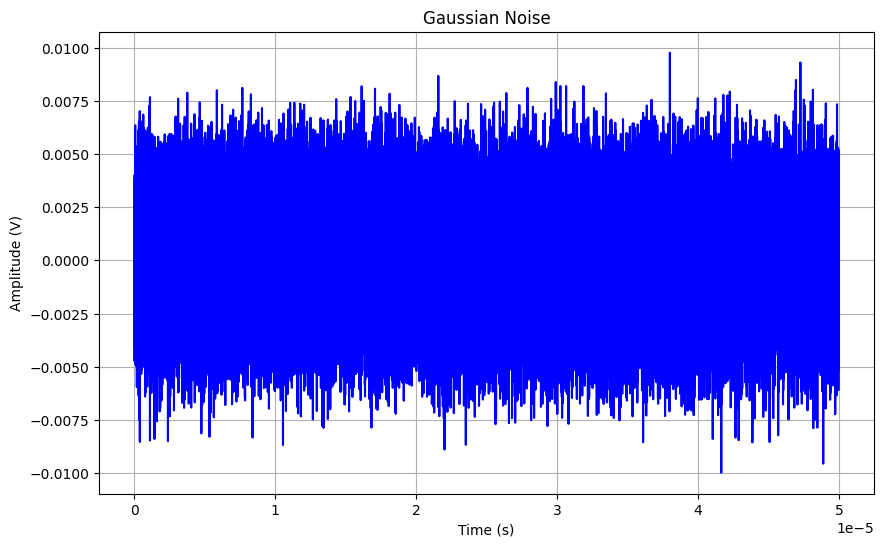

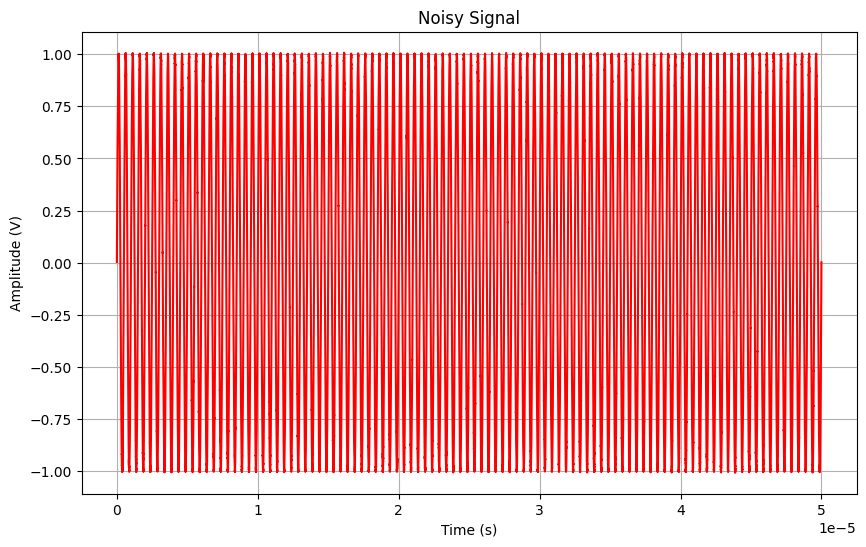

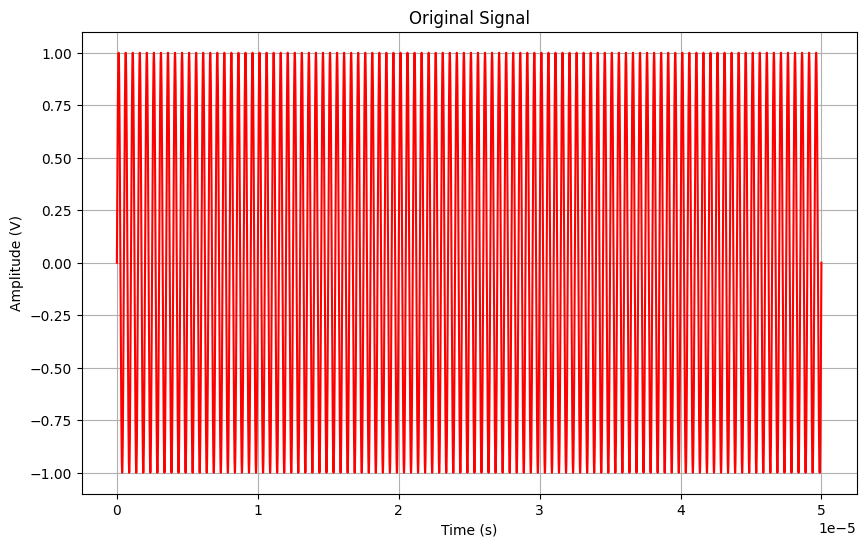

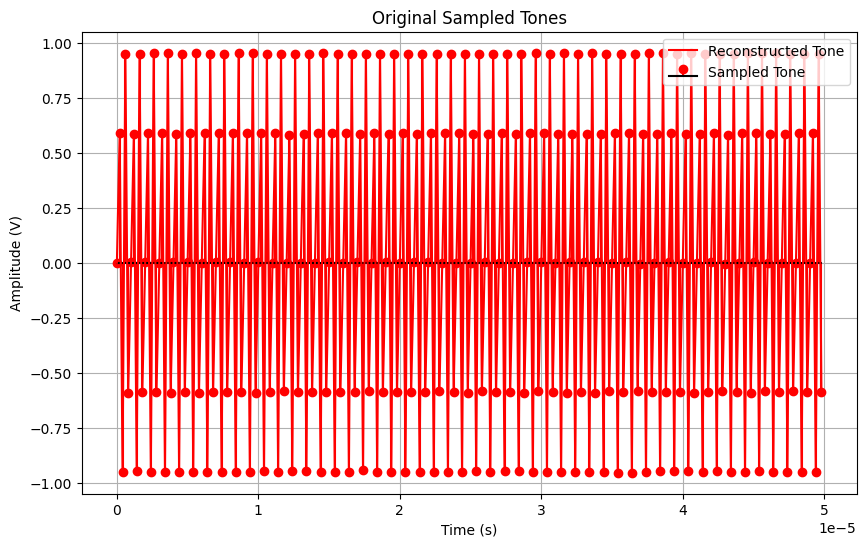

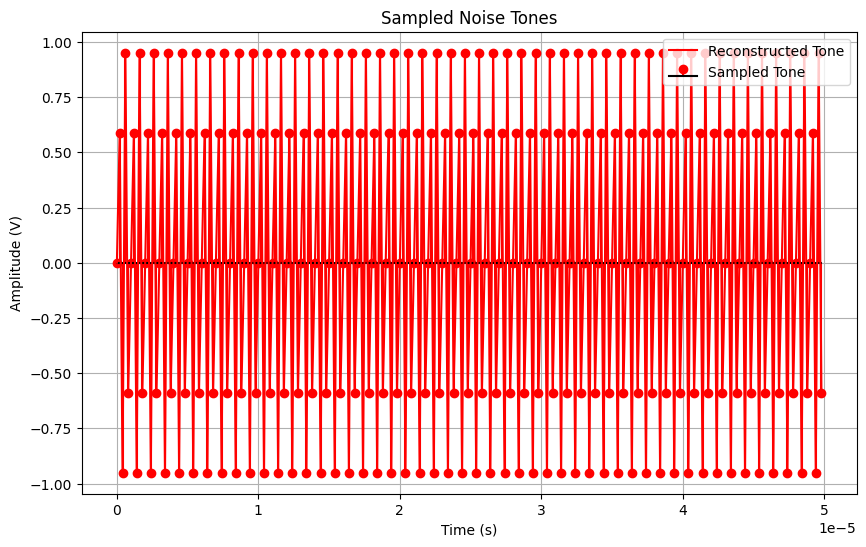

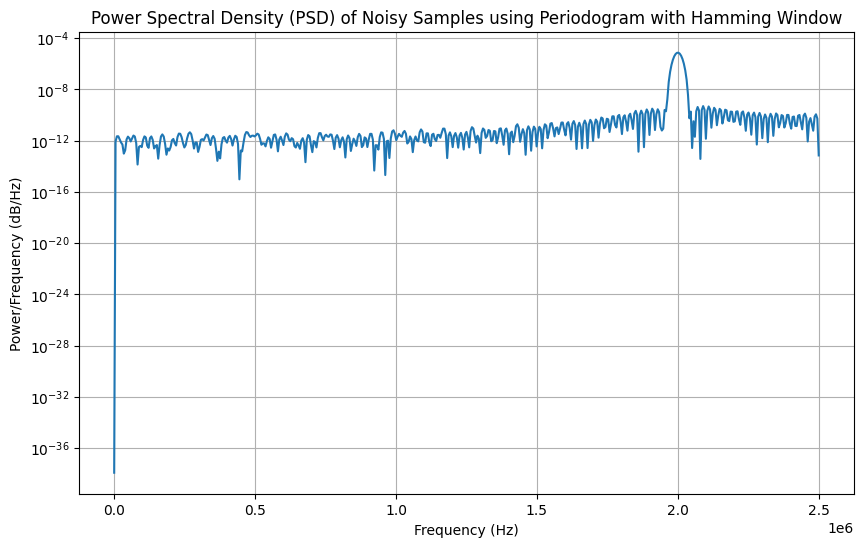

Signal Power-noisy: 0.009999975941800791 W
Noise Power-noisy: 1.325524964210134e-07 W
Calculated SNR (from periodogram): 48.77611043754228 dB
Theoretical SNR: 50 dB
Variance of uniformly distributed noise for same SNR: 1.3255249642101337e-07


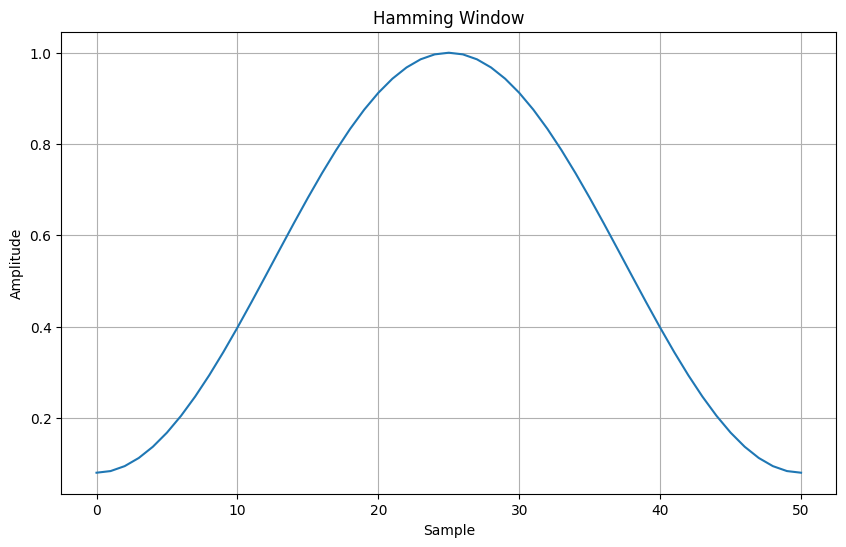

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import periodogram, get_window

# Define parameters
frequency = 2e6  # 2 MHz
amplitude = 1.0  # 1 V
sampling_frequency = 5e6  # 5 MHz

# Time array for the original tone
original_t = np.linspace(0, 100*(1 / frequency), 100000)
# original sine wave
original_tone = amplitude * np.sin(2 * np.pi * frequency * original_t)

sampling_interval = 1 / sampling_frequency
sampled_t = np.arange(0, 100*(1 / frequency), sampling_interval)
# Compute the mean value of the original tone
mean_power = np.mean(original_tone ** 2)

print("Mean power of the Original Tone:", mean_power, "V")

# For SNR = 50 dB, calculated noise variance using mean power obtained from above.
noise_variance = mean_power / (10**(50 / 10))

# Generate Gaussian noise with the calculated variance
noise = np.random.normal(0, np.sqrt(noise_variance), len(original_t))

# Adding noise to the original tone
noisy_tone = original_tone + noise
mean_power_noisy = np.mean(noisy_tone ** 2)
mean_power_noise = np.mean(noise ** 2)

print("Mean power of the noise:", mean_power_noise, "V")
print("Mean power of the noisy Tone:", mean_power_noisy, "V")

# Generate the sampled sine wave
sampled_tone = amplitude * np.sin(2 * np.pi * frequency * sampled_t)
sampled_noisy_tone = amplitude * np.sin(2 * np.pi * frequency * sampled_t) + np.random.normal(0, np.sqrt(noise_variance), len(sampled_t))

# Apply Hamming window using get_window function
window = get_window('hamming', len(sampled_t))
sampled_noisy_tone_windowed = sampled_noisy_tone * window

# Plot the noise
plt.figure(figsize=(10, 6))
plt.plot(original_t, noise, color='blue')
plt.title('Gaussian Noise')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (V)')
plt.grid(True)
plt.show()

# Noisy signal plot
plt.figure(figsize=(10, 6))
plt.plot(original_t, noisy_tone, color='red')
plt.title('Noisy Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (V)')
plt.grid(True)
plt.show()

# Plot the original tone
plt.figure(figsize=(10, 6))
plt.plot(original_t, original_tone, color='red')
plt.title('Original Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (V)')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.stem(sampled_t, sampled_noisy_tone, 'r', markerfmt='ro', linefmt='r', basefmt='k', label='Sampled Tone')
plt.plot(sampled_t, sampled_noisy_tone, 'r', label='Reconstructed Tone')
plt.title('Original Sampled Tones')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (V)')
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.stem(sampled_t, sampled_tone, 'r', markerfmt='ro', linefmt='r', basefmt='k', label='Sampled Tone')
plt.plot(sampled_t, sampled_tone, 'r', label='Reconstructed Tone')
plt.title('Sampled Noise Tones')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (V)')
plt.grid(True)
plt.legend()
plt.show()

# Plot the Power Spectral Density (PSD) with Hamming window applied
frequencies, psd = periodogram(sampled_noisy_tone_windowed, fs=sampling_frequency, nfft=1024)

plt.figure(figsize=(10, 6))
plt.semilogy(frequencies, psd)
plt.title('Power Spectral Density (PSD) of Noisy Samples using Periodogram with Hamming Window')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.grid(True)
plt.show()

frequencies, psd = periodogram(noisy_tone, fs=sampling_frequency, scaling='density')

freq_xmax = frequencies[np.argmax(psd)]

signal_power = 0
noise_power = 0
for i in range(len(frequencies)):
    if frequencies[i] == freq_xmax:
        signal_power += psd[i]
    else:
        noise_power += psd[i]

print("Signal Power-noisy:", signal_power, "W")
print("Noise Power-noisy:", noise_power, "W")

# SNR in dB
SNR_dB = 10 * np.log10(signal_power / noise_power)
print("Calculated SNR (from periodogram):", SNR_dB, "dB")
print("Theoretical SNR: 50 dB")
uniform_noise_variance = signal_power / (10 ** (SNR_dB / 10))
print("Variance of uniformly distributed noise for same SNR:", uniform_noise_variance)
import numpy as np
import matplotlib.pyplot as plt

# Create a Hamming window
M = 51
window = np.hamming(M)

# Plot the window
plt.figure(figsize=(10, 6))
plt.plot(window)
plt.title("Hamming Window")
plt.xlabel("Sample")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

Mean power of the Original Tone: 0.499995 V
Mean power of the noise: 4.975588129600544e-06 V
Mean power of the noisy Tone: 0.49999911150741566 V


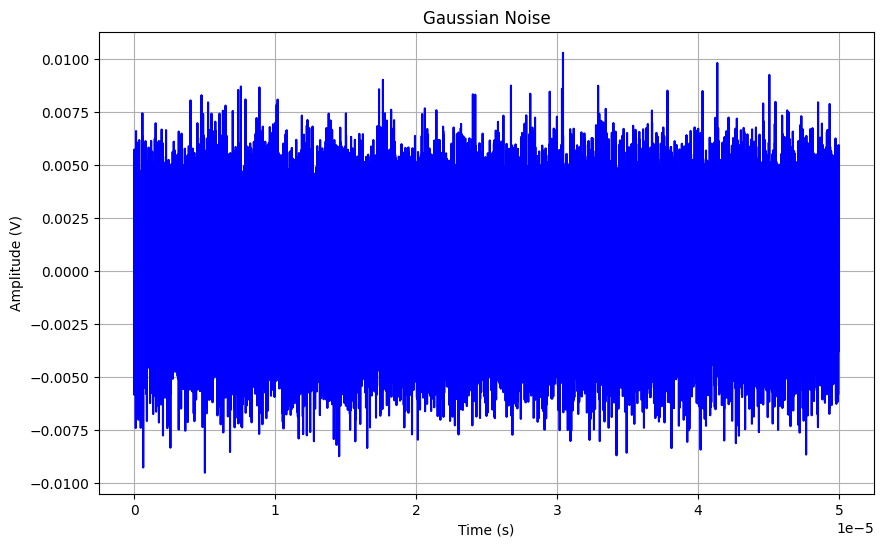

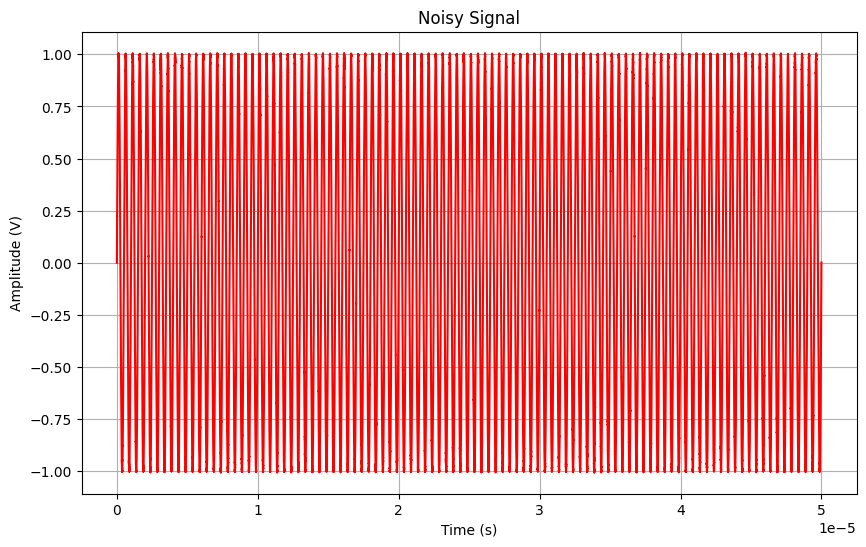

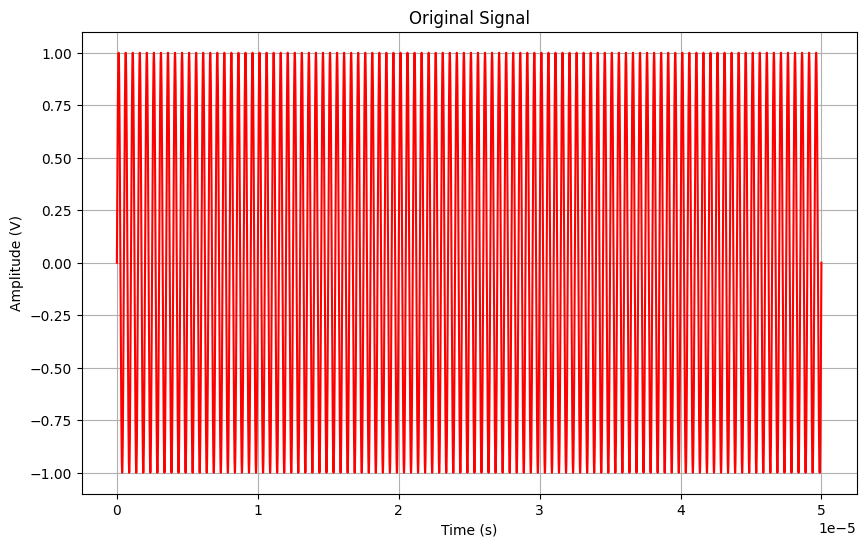

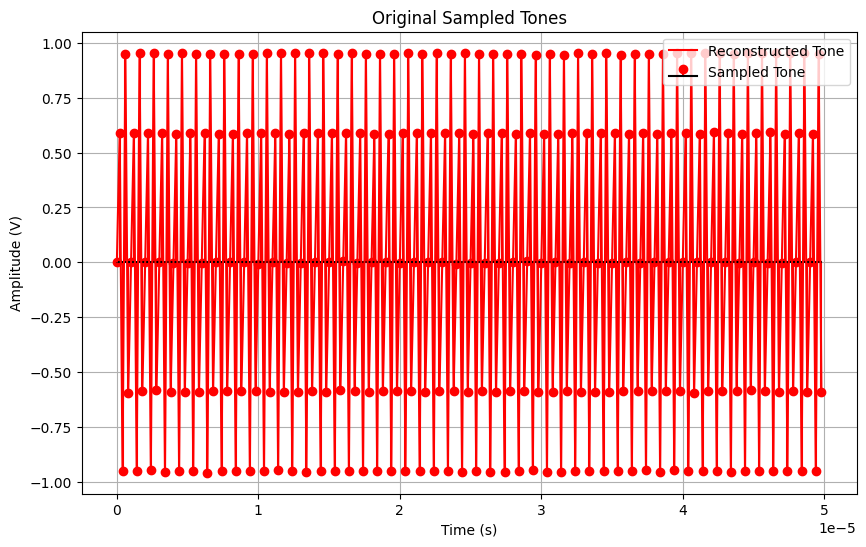

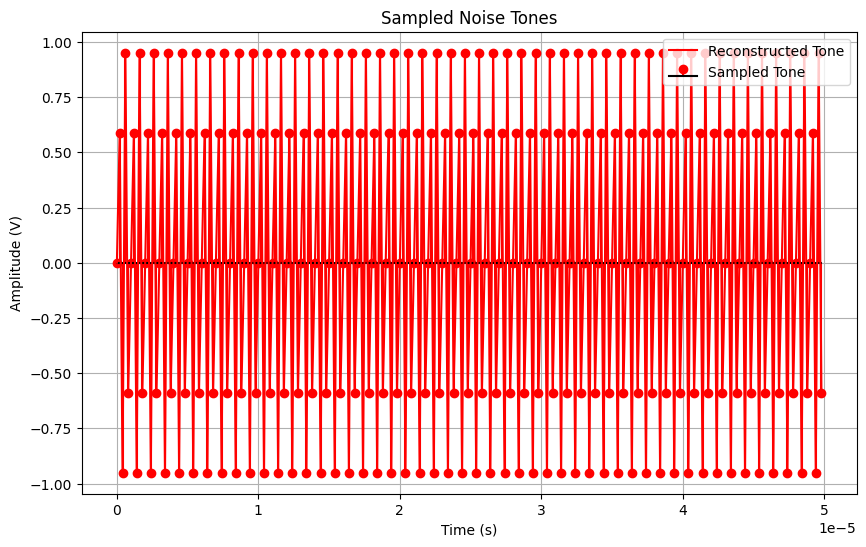

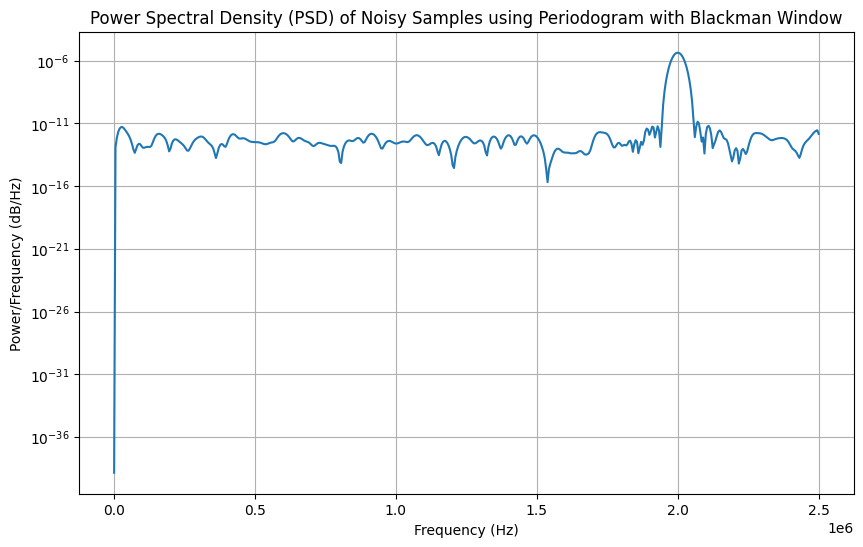

Signal Power-noisy: 0.009999849812797964 W
Noise Power-noisy: 1.3241473643596384e-07 W
Calculated SNR (from periodogram): 48.78057156977646 dB
Theoretical SNR: 50 dB
Variance of uniformly distributed noise for same SNR: 1.3241473643596387e-07


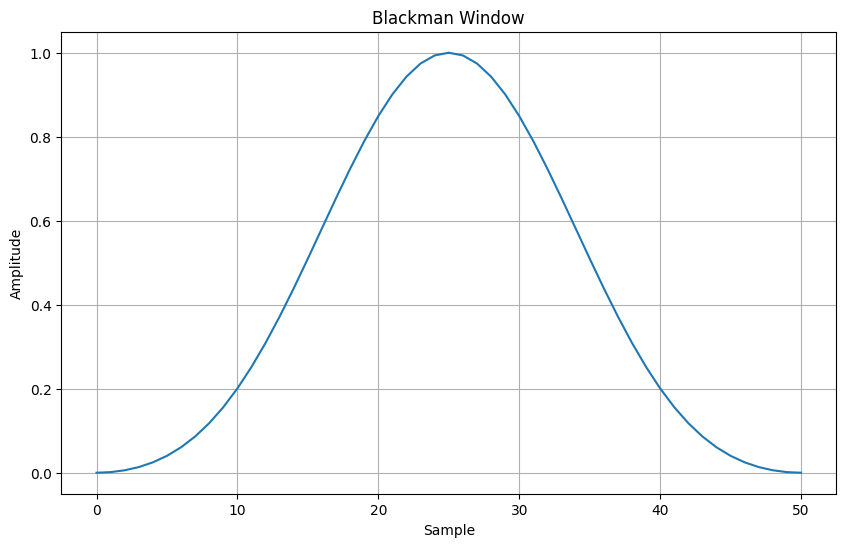

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import periodogram, get_window

# Define parameters
frequency = 2e6  # 2 MHz
amplitude = 1.0  # 1 V
sampling_frequency = 5e6  # 5 MHz

# Time array for the original tone
original_t = np.linspace(0, 100*(1 / frequency), 100000)
# original sine wave
original_tone = amplitude * np.sin(2 * np.pi * frequency * original_t)

sampling_interval = 1 / sampling_frequency
sampled_t = np.arange(0, 100*(1 / frequency), sampling_interval)
# Compute the mean value of the original tone
mean_power = np.mean(original_tone ** 2)

print("Mean power of the Original Tone:", mean_power, "V")

# For SNR = 50 dB, calculated noise variance using mean power obtained from above.
noise_variance = mean_power / (10**(50 / 10))

# Generate Gaussian noise with the calculated variance
noise = np.random.normal(0, np.sqrt(noise_variance), len(original_t))

# Adding noise to the original tone
noisy_tone = original_tone + noise
mean_power_noisy = np.mean(noisy_tone ** 2)
mean_power_noise = np.mean(noise ** 2)

print("Mean power of the noise:", mean_power_noise, "V")
print("Mean power of the noisy Tone:", mean_power_noisy, "V")

# Generate the sampled sine wave
sampled_tone = amplitude * np.sin(2 * np.pi * frequency * sampled_t)
sampled_noisy_tone = amplitude * np.sin(2 * np.pi * frequency * sampled_t) + np.random.normal(0, np.sqrt(noise_variance), len(sampled_t))

# Apply Blackman window using get_window function
window = get_window('blackman', len(sampled_t))
sampled_noisy_tone_windowed = sampled_noisy_tone * window

# Plot the noise
plt.figure(figsize=(10, 6))
plt.plot(original_t, noise, color='blue')
plt.title('Gaussian Noise')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (V)')
plt.grid(True)
plt.show()

# Noisy signal plot
plt.figure(figsize=(10, 6))
plt.plot(original_t, noisy_tone, color='red')
plt.title('Noisy Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (V)')
plt.grid(True)
plt.show()

# Plot the original tone
plt.figure(figsize=(10, 6))
plt.plot(original_t, original_tone, color='red')
plt.title('Original Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (V)')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.stem(sampled_t, sampled_noisy_tone, 'r', markerfmt='ro', linefmt='r', basefmt='k', label='Sampled Tone')
plt.plot(sampled_t, sampled_noisy_tone, 'r', label='Reconstructed Tone')
plt.title('Original Sampled Tones')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (V)')
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.stem(sampled_t, sampled_tone, 'r', markerfmt='ro', linefmt='r', basefmt='k', label='Sampled Tone')
plt.plot(sampled_t, sampled_tone, 'r', label='Reconstructed Tone')
plt.title('Sampled Noise Tones')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (V)')
plt.grid(True)
plt.legend()
plt.show()

# Plot the Power Spectral Density (PSD) with Blackman window applied
frequencies, psd = periodogram(sampled_noisy_tone_windowed, fs=sampling_frequency, nfft=1024)

plt.figure(figsize=(10, 6))
plt.semilogy(frequencies, psd)
plt.title('Power Spectral Density (PSD) of Noisy Samples using Periodogram with Blackman Window')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.grid(True)
plt.show()

frequencies, psd = periodogram(noisy_tone, fs=sampling_frequency, scaling='density')

freq_xmax = frequencies[np.argmax(psd)]

signal_power = 0
noise_power = 0
for i in range(len(frequencies)):
    if frequencies[i] == freq_xmax:
        signal_power += psd[i]
    else:
        noise_power += psd[i]

print("Signal Power-noisy:", signal_power, "W")
print("Noise Power-noisy:", noise_power, "W")

# SNR in dB
SNR_dB = 10 * np.log10(signal_power / noise_power)
print("Calculated SNR (from periodogram):", SNR_dB, "dB")
print("Theoretical SNR: 50 dB")
uniform_noise_variance = signal_power / (10 ** (SNR_dB / 10))
print("Variance of uniformly distributed noise for same SNR:", uniform_noise_variance)

# Create a Blackman window for comparison
M = 51
window = np.blackman(M)

# Plot the Blackman window
plt.figure(figsize=(10, 6))
plt.plot(window)
plt.title("Blackman Window")
plt.xlabel("Sample")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

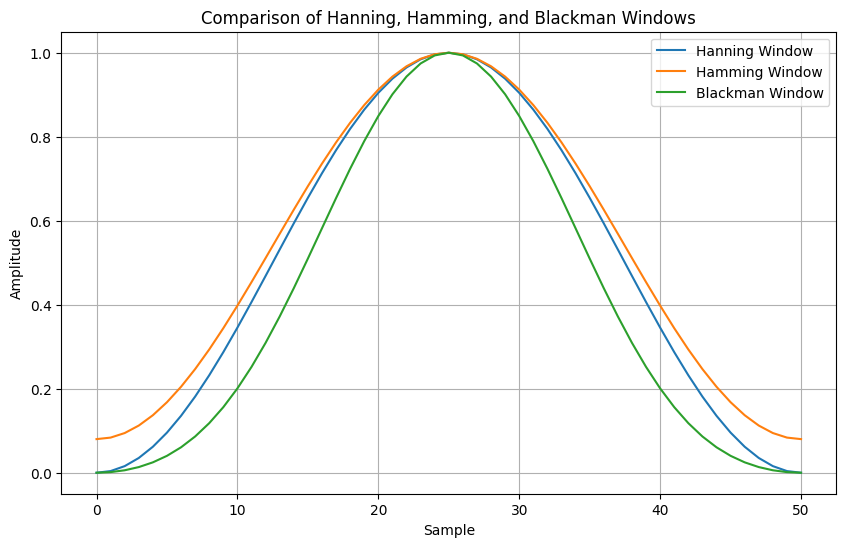

In [41]:
import numpy as np
import matplotlib.pyplot as plt

# Create the windows
M = 51
hanning_window = np.hanning(M)
hamming_window = np.hamming(M)
blackman_window = np.blackman(M)

# Plot the windows
plt.figure(figsize=(10, 6))
plt.plot(hanning_window, label="Hanning Window")
plt.plot(hamming_window, label="Hamming Window")
plt.plot(blackman_window, label="Blackman Window")
plt.title("Comparison of Hanning, Hamming, and Blackman Windows")
plt.xlabel("Sample")
plt.ylabel("Amplitude")
plt.grid(True)
plt.legend()
plt.show()


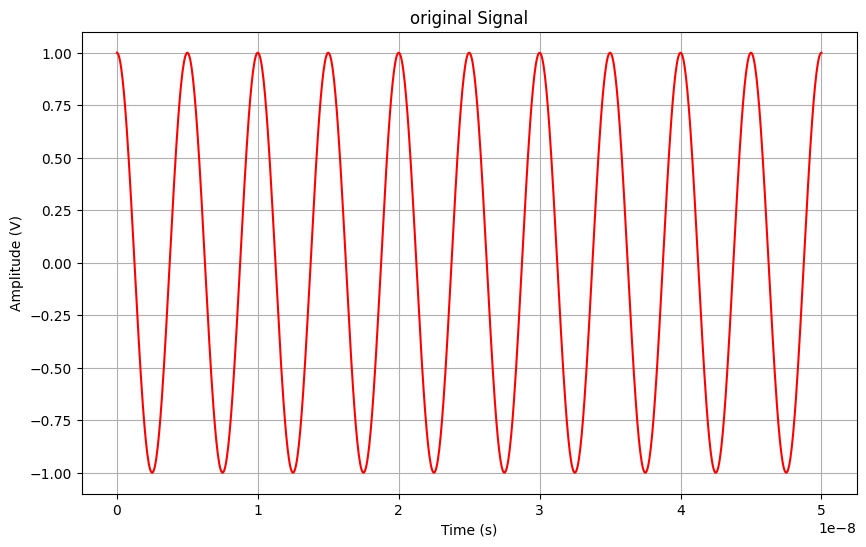

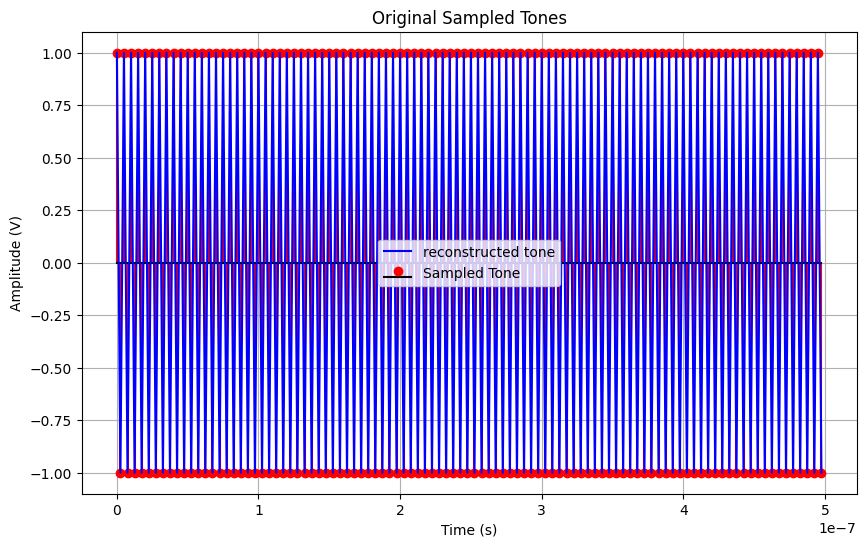

<Figure size 640x480 with 0 Axes>

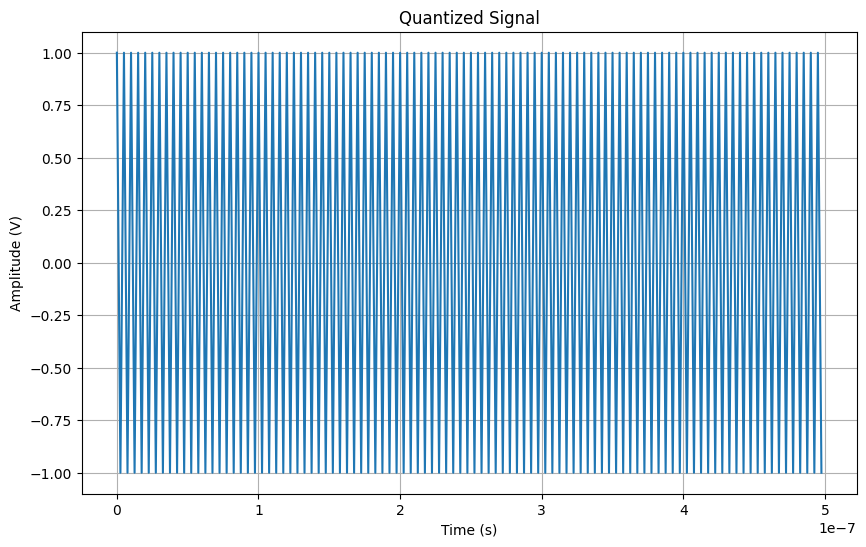

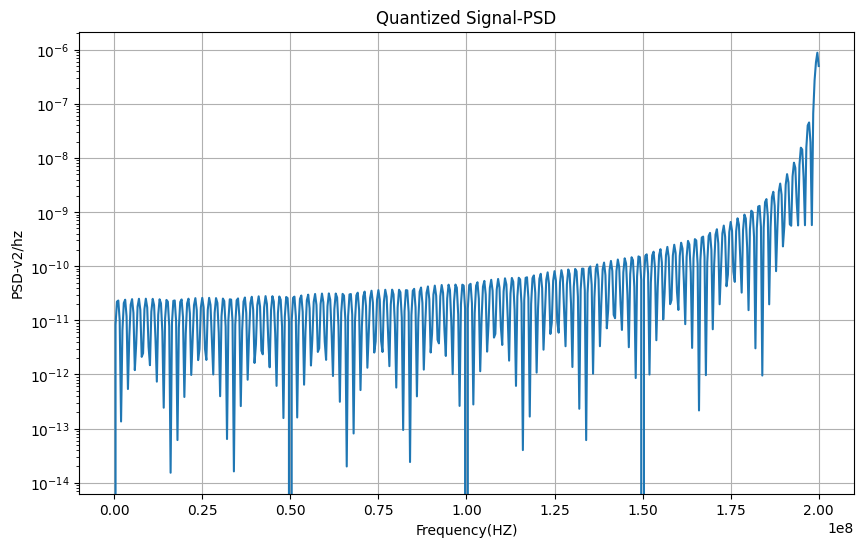

Signal power 8.806375848277412e-07
Noise power 2.2187895813246033e-10
SNR obtained =  35.986810989071664 dB


In [1]:
#2B
import matplotlib.pyplot as plt
import numpy as np # to work with numerical data efficiently from scipy.interpolate import interp1d
from scipy import signal

#signal
frequency= 200e6
T= 1/frequency

original_t = np.linspace(0, 10*T, 1000)
Y = np.cos(2*np.pi*frequency* original_t)
# Plot the original tone
plt.figure(figsize=(10, 6))
plt.plot(original_t, Y , color='red')
plt.title('original Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (V)')
plt.grid(True)
plt.show()


#sampling
sampling_freq= 400e6
Ts = 1/sampling_freq

sampled_t = np.arange(0, (100*T), Ts)
sampled_sig = np.cos(2*np.pi*frequency* sampled_t)

plt.figure(figsize=(10, 6))


plt.stem(sampled_t, sampled_sig, 'r', markerfmt='ro', linefmt='r', basefmt='k', label='Sampled Tone')
plt.plot(sampled_t, sampled_sig,'b',label='reconstructed tone')

plt.title('Original Sampled Tones')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (V)')
plt.grid(True)
plt.legend()
plt.show()

plt.tight_layout() # optional for improving spacing #Quantisation
def quantize(signal, bits):
  quant_levels = 2**bits
  quant_step = (1) / quant_levels
  quant_signal = (np.round(signal/quant_step) * quant_step)
  return quant_signal

sampled_sig_quan = quantize(sampled_sig,6)
# tq = np.linspace(0, (30*T), 10000)
plt.figure(figsize=(10, 6))
plt.plot(sampled_t, sampled_sig_quan)
plt.title('Quantized Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (V)')
plt.grid(True)
plt.show()


bits = 6
quant_levels = 2**bits
noise_signal = sampled_sig_quan - np.round(sampled_sig_quan*(quant_levels-1)/2)/(quant_levels-1)*2 #quantising input tone

f, Pxx_den = signal.periodogram(sampled_sig_quan, sampling_freq, nfft=1024) #Plotting Quant_PSD
n=len(sampled_t)
fft_sampled_sig_quan = np.fft.fft(sampled_sig_quan, n) #computes the fft
psd_sampled_sig_quan = fft_sampled_sig_quan * np.conj(fft_sampled_sig_quan)/n

freq_signal = (sampling_freq/n) * np.arange(n) #frequency array



plt.figure(figsize=(10, 6))
plt.semilogy(f,Pxx_den)
plt.title('Quantized Signal-PSD')
plt.xlabel('Frequency(HZ)')
plt.ylabel('PSD-v2/hz')
plt.grid(True)
plt.show()

f_xmax = f[np.argmax(Pxx_den)]
signal_power = 0
noise_power=0

for i in range(len(f)):
  #print("Pxx max "+str(i)+" "+str(Pxx_den[i]))
  if(f[i]==f_xmax):
    signal_power+= Pxx_den[i]
    f, Pxx_den = signal.periodogram(noise_signal, sampling_freq, nfft=1024)
    f_xmax = f[np.argmax(Pxx_den)]
for i in range(len(f)):
  if(f[i]==f_xmax):
    noise_power+= Pxx_den[i]

print("Signal power", signal_power)
print("Noise power", noise_power)
#SNR Calculation from the Spectral density plot by integrating the AOCs between signal and noise
actualSNR = 10*np.log10(signal_power/noise_power);
print("SNR obtained = ",str(actualSNR),"dB");



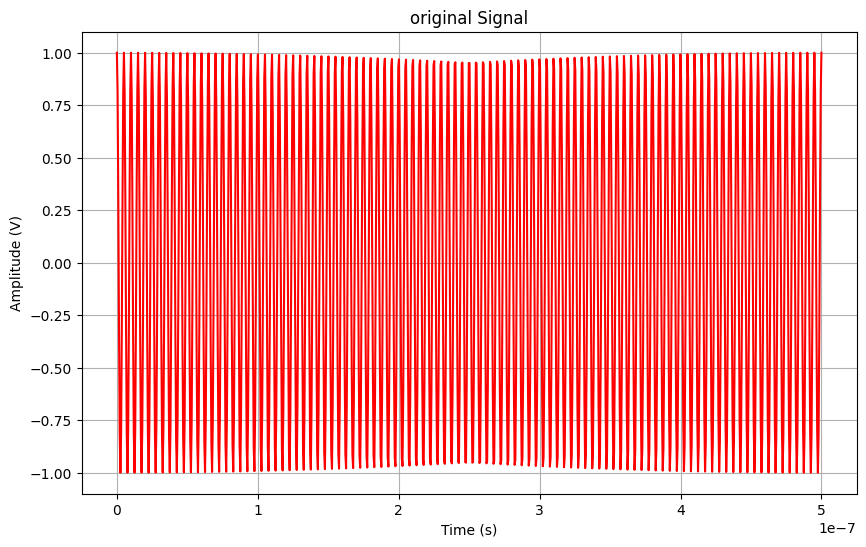

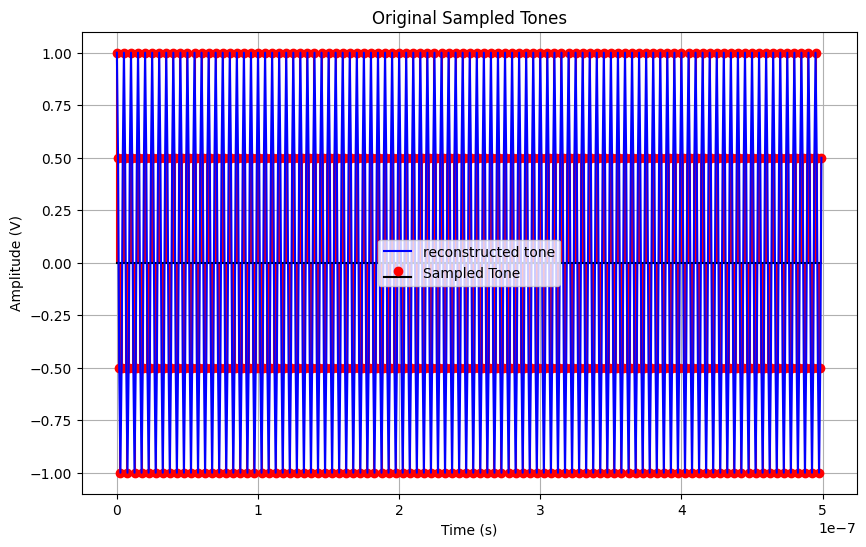

number of bits 12
[-1.95312500e-03  6.39648438e-02  6.34765625e-02  5.37109375e-03
 -7.56835938e-02 -8.05664062e-02  4.88281250e-04  7.27539062e-02
  7.37304688e-02  1.95312500e-03 -7.95898438e-02 -7.12890625e-02
  1.07421875e-02  6.54296875e-02  6.68945312e-02  9.76562500e-04
 -7.76367188e-02 -8.25195312e-02 -4.88281250e-03  6.88476562e-02
  8.78906250e-02  6.83593750e-03 -9.08203125e-02 -7.37304688e-02
 -2.44140625e-03  7.32421875e-02  8.59375000e-02  4.88281250e-03
 -7.03125000e-02 -7.81250000e-02 -1.41601562e-02  8.30078125e-02
  9.27734375e-02 -4.88281250e-04 -1.19140625e-01 -8.93554688e-02
 -1.61132812e-02  1.03027344e-01  9.27734375e-02  1.95312500e-03
 -1.00097656e-01 -1.12792969e-01 -4.88281250e-04  1.03027344e-01
  1.18652344e-01  2.05078125e-02 -1.25976562e-01 -1.07910156e-01
 -1.46484375e-03  1.25000000e-01  1.30859375e-01  3.41796875e-03
 -1.32324219e-01 -1.37695312e-01  1.95312500e-02  1.20117188e-01
  1.21093750e-01 -3.56445312e-02 -1.53808594e-01 -1.55761719e-01
 -2.929

<Figure size 640x480 with 0 Axes>

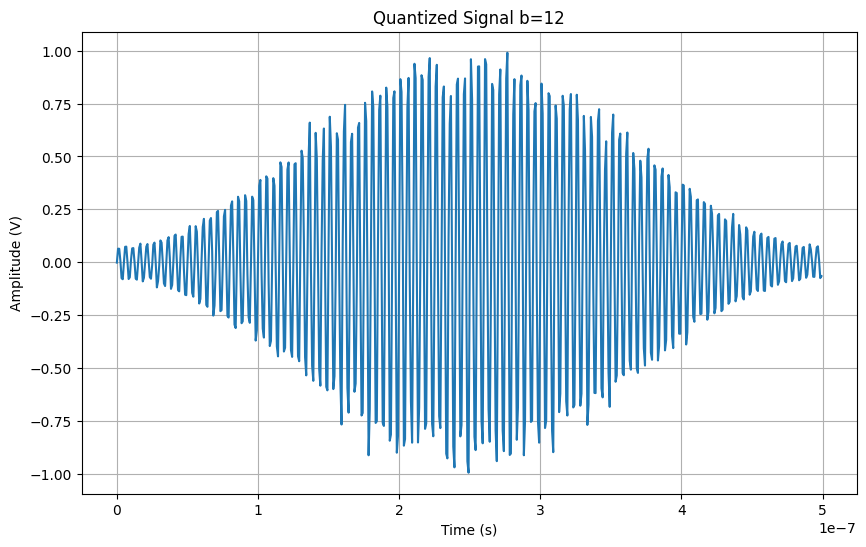

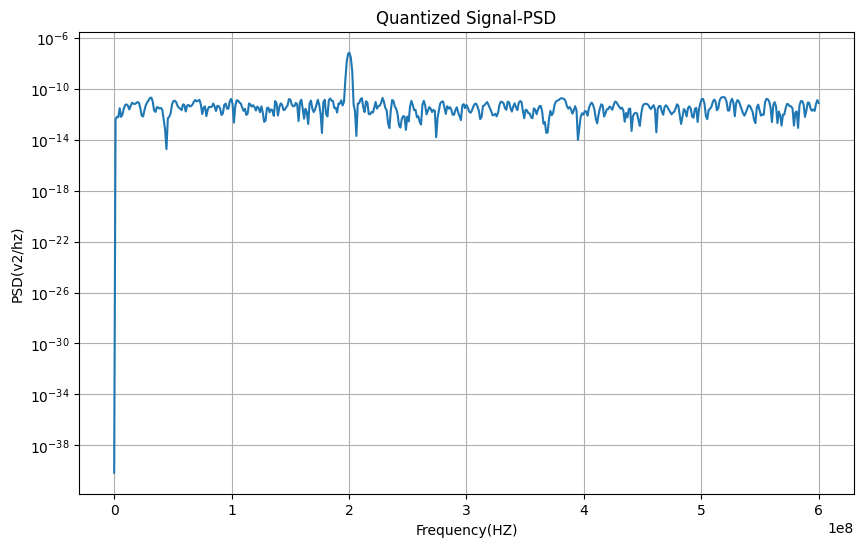

Signal power 6.865070901742676e-08
Noise power 4.0938998550855454e-15
SNR obtained =  72.2450781219288 dB


In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import periodogram

# Original signal
frequency= 200e6
T= 1/frequency
amplitude=1
original_t = np.linspace(0, 100*T, 1000)
Y = amplitude * np.cos(2*np.pi*frequency* original_t)
# Plot the original tone
plt.figure(figsize=(10, 6))
plt.plot(original_t, Y , color='red')
plt.title('original Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (V)')
plt.grid(True)
plt.show()


#sampling and sampled tones
sampling_freq= 1200e6
Ts = 1/sampling_freq

sampled_t = np.arange(0, (100*T), Ts)
sampled_sig = amplitude * np.cos(2*np.pi*frequency* sampled_t)
noise_variance=70e-4

# Generate Gaussian noise with variance 70e-4
noise = np.random.normal(0, np.sqrt(noise_variance), len(original_t))

# Add noise to the original tone
noisy_tone = Y + noise
sampled_noisy_tone = amplitude * np.sin(2 * np.pi * frequency * sampled_t) + \
                      np.random.normal(0, np.sqrt(noise_variance), len(sampled_t))


plt.figure(figsize=(10, 6))
plt.stem(sampled_t, sampled_sig, 'r', markerfmt='ro', linefmt='r', basefmt='k', label='Sampled Tone')
plt.plot(sampled_t, sampled_sig,'b',label='reconstructed tone')
plt.title('Original Sampled Tones')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (V)')
plt.grid(True)
plt.legend()
plt.show()

plt.tight_layout()

def quantize(signal, bits):

  quant_levels = 2**bits
  print("number of bits", bits)
  quant_step = (2*amplitude) / quant_levels
  quant_signal = (np.round(signal/quant_step)* quant_step)
  print(quant_signal)
  return quant_signal




sampled_sig_win=sampled_noisy_tone * np.hamming(len(sampled_noisy_tone))

sampled_sig_quan = quantize(sampled_sig_win,12)

plt.figure(figsize=(10, 6))
plt.plot(sampled_t, sampled_sig_quan)
plt.title('Quantized Signal b=12')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (V)')
plt.grid(True)
plt.show()

bits = 12
quant_levels = 2**bits
noise_signal = sampled_sig_quan - np.round(sampled_sig_quan*(quant_levels-1)/2)/(quant_levels-1)*2

f, psd = periodogram(sampled_sig_quan, sampling_freq, nfft=1024)
n=len(sampled_t)

plt.figure(figsize=(10, 6))
plt.semilogy(f,psd)
plt.title('Quantized Signal-PSD')
plt.xlabel('Frequency(HZ)')
plt.ylabel('PSD(v2/hz)')
plt.grid(True)
plt.show()

f_xmax = f[np.argmax(psd)]
signal_power = 0
noise_power=0

for i in range(len(f)):

  if(f[i]==f_xmax):
    signal_power+= psd[i]
    f, psd = periodogram(noise_signal, sampling_freq, nfft=1024)
    f_xmax = f[np.argmax(psd)]
for i in range(len(f)):
  if(f[i]==f_xmax):
    noise_power+= psd[i]

print("Signal power", signal_power)
print("Noise power", noise_power)
#SNR Calculation from the Spectral density plot
actualSNR = 10*np.log10(signal_power/noise_power);
print("SNR obtained = ",str(actualSNR),"dB");
